In [9]:
library(dplyr)

In [81]:
# load the experiment design
doe <- read.csv("general_trial_run_1_description.csv", header = TRUE)
# load the results
results <- read.csv("straight-run-trial general experiment template-table.csv", skip=6, header = TRUE)

In [82]:
# rename the index of the experiment design data
colnames(doe)[1] <- "experiment.number"

In [83]:
# merge the results with the experiment factors
data <- merge(results, doe, by = "experiment.number")

In [84]:
head(data)

experiment.number,X.run.number.,X.step.,objective.mine.speed,objective.mine.position,objective.mine.detected.ratio,turn.radius,uuv.speed,nav.bearing.std,nav.velocity.std.cm,...,side_angle,side_low_range,side_hi_range,side_p_detect,forward_angle,forward_low_range,forward_hi_range,forward_p_detect,current.heading,drift.speed
0,6,15000,-14.800,-14.800,0.040,5.375398,2.170104,0.7359034,2.017029,...,81.11468,20.24307,985.8806,0.6906851,82.18991,17.24044,572.9936,0.8660535,275.6813,0.2090705
0,1,15000,-14.200,-14.200,0.160,5.375398,2.170104,0.7359034,2.017029,...,81.11468,20.24307,985.8806,0.6906851,82.18991,17.24044,572.9936,0.8660535,275.6813,0.2090705
0,3,15000,-16.725,-16.725,0.055,5.375398,2.170104,0.7359034,2.017029,...,81.11468,20.24307,985.8806,0.6906851,82.18991,17.24044,572.9936,0.8660535,275.6813,0.2090705
0,5,15000,-14.775,-14.775,0.045,5.375398,2.170104,0.7359034,2.017029,...,81.11468,20.24307,985.8806,0.6906851,82.18991,17.24044,572.9936,0.8660535,275.6813,0.2090705
0,4,4722,-3.772,-3.772,0.190,5.375398,2.170104,0.7359034,2.017029,...,81.11468,20.24307,985.8806,0.6906851,82.18991,17.24044,572.9936,0.8660535,275.6813,0.2090705
0,7,4740,-4.165,-4.165,0.115,5.375398,2.170104,0.7359034,2.017029,...,81.11468,20.24307,985.8806,0.6906851,82.18991,17.24044,572.9936,0.8660535,275.6813,0.2090705


In [94]:
# reduce results from multiple runs as summary statistics
data %>% 
    group_by(experiment.number) %>% 
    summarise(speed_mean=mean(objective.mine.speed),
             speed_max=max(objective.mine.speed),
             speed_min=min(objective.mine.speed),
             speed_median=median(objective.mine.speed)) %>%
    merge(doe, by="experiment.number") -> processed_data

head(processed_data)

experiment.number,speed_mean,speed_max,speed_min,speed_median,turn.radius,uuv.speed,nav.bearing.std,nav.velocity.std.cm,max.obs.dist,...,side_angle,side_low_range,side_hi_range,side_p_detect,forward_angle,forward_low_range,forward_hi_range,forward_p_detect,current.heading,drift.speed
0,-9.2964,-3.021,-16.725,-9.1825,5.375398,2.170104,0.7359034,2.0170293,5.160420,...,81.11468,20.243068,985.8806,0.6906851,82.18991,17.240438,572.99362,0.8660535,275.68133,0.2090705
1,-9.2048,-3.563,-14.650,-9.6965,11.845933,2.757327,3.9342750,5.4139923,7.535228,...,106.13295,4.400791,894.4290,0.8141711,30.29700,4.467615,469.90390,0.8831937,184.62724,0.4927339
2,-9.0013,-3.019,-14.850,-8.7970,18.327015,3.766723,1.7389540,9.3162891,2.787151,...,50.15681,38.828614,297.4658,0.7999556,88.29910,15.208680,442.73890,0.9371328,220.62767,0.5452489
3,-6.5789,-3.016,-13.950,-4.4765,7.439189,3.725374,1.2782085,0.1638696,2.374758,...,119.59798,33.578248,216.1840,0.7887305,28.70319,10.044737,325.09882,0.5080395,85.92679,0.5359218
4,-7.8522,-3.433,-14.975,-4.5710,14.318106,2.751821,3.7988810,1.3653394,7.163403,...,44.45242,27.706439,756.6231,0.9213292,85.44025,2.739265,98.02579,0.6225485,58.12139,1.9273755
5,-7.7919,-3.493,-14.900,-5.0830,5.009271,2.557183,3.2117680,5.8800192,3.122157,...,50.34849,6.090979,550.5918,0.7048383,88.94552,1.160187,765.50887,0.6103728,87.89216,1.1150387


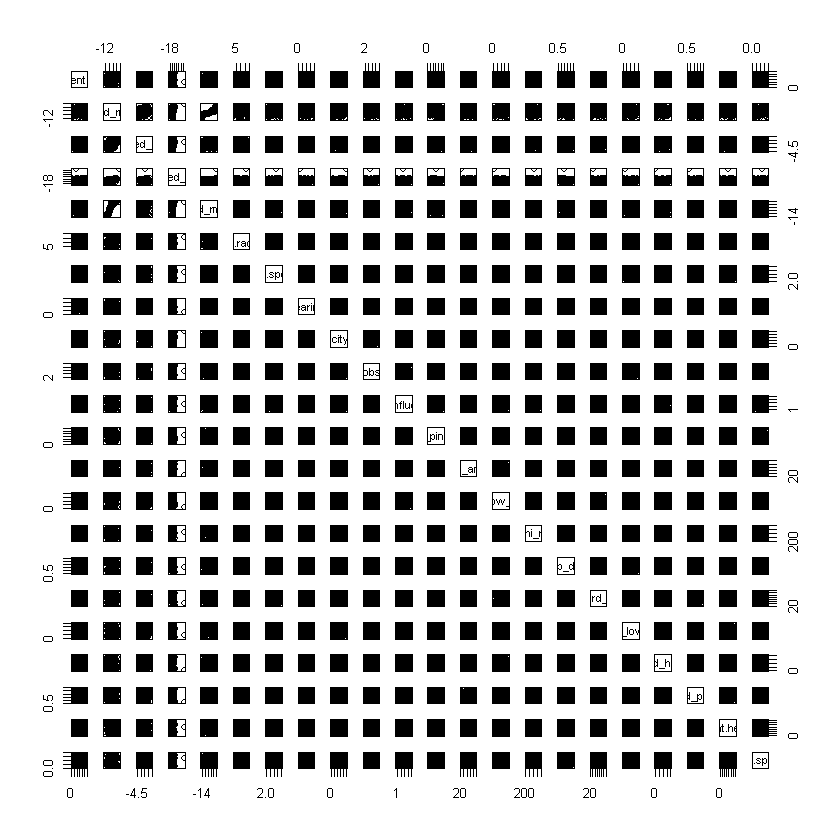

In [95]:
plot(processed_data)

In [96]:
cor(processed_data)

,experiment.number,speed_mean,speed_max,speed_min,speed_median,turn.radius,uuv.speed,nav.bearing.std,nav.velocity.std.cm,max.obs.dist,...,side_angle,side_low_range,side_hi_range,side_p_detect,forward_angle,forward_low_range,forward_hi_range,forward_p_detect,current.heading,drift.speed
experiment.number,1.000000000,0.01963519,0.009837619,0.003117821,0.02452609,-0.051269131,-0.062942785,-0.042650111,5.700557e-02,-0.008096105,...,0.0432299692,0.063106216,-0.007559052,-0.059316825,-0.0924528184,-0.0032041915,-0.049736869,0.052862227,-0.114199019,-0.040999427
speed_mean,0.019635187,1.00000000,0.402435349,0.330328406,0.89944456,-0.010265854,0.102249305,0.045879164,1.071448e-01,0.024931227,...,-0.0205783102,0.065474698,-0.009395300,-0.087162257,-0.0347482769,-0.0982648624,0.015710847,-0.067764996,-0.012238155,0.094123754
speed_max,0.009837619,0.40243535,1.000000000,0.119580969,0.33264676,-0.007708986,0.072990124,0.004072884,6.209370e-02,-0.005322163,...,0.0340948256,0.103745205,0.008142699,-0.057482220,0.0303644957,0.0260763884,-0.020433148,0.021522608,0.045142858,-0.005915008
speed_min,0.003117821,0.33032841,0.119580969,1.000000000,0.20985263,-0.019046713,0.035729214,-0.054491021,7.283245e-02,0.037070984,...,-0.0523565354,0.041125145,-0.016477236,-0.051313862,-0.0998168140,-0.0162051168,-0.073570663,-0.124480221,0.012267641,0.004024123
speed_median,0.024526095,0.89944456,0.332646757,0.209852634,1.00000000,-0.022015730,0.110549687,0.070804217,8.939277e-02,0.045144897,...,-0.0409513174,0.039697320,-0.016493542,-0.089655977,-0.0370872089,-0.0843802275,0.057660626,-0.044204913,-0.030295358,0.098053053
turn.radius,-0.051269131,-0.01026585,-0.007708986,-0.019046713,-0.02201573,1.000000000,0.076281518,0.049385390,-3.304872e-02,-0.044077755,...,-0.0802634280,-0.017330072,-0.058403701,0.078276684,0.0260660944,0.0275115109,0.005139670,-0.010582765,-0.013806876,-0.060124881
uuv.speed,-0.062942785,0.10224930,0.072990124,0.035729214,0.11054969,0.076281518,1.000000000,0.030243340,2.457573e-02,-0.002691183,...,0.0795008430,0.017085679,-0.074071645,-0.001000984,0.0466183614,0.0323831849,-0.018890322,-0.053051747,0.051218750,-0.025881840
nav.bearing.std,-0.042650111,0.04587916,0.004072884,-0.054491021,0.07080422,0.049385390,0.030243340,1.000000000,4.342373e-02,-0.044058494,...,0.0323286723,0.045660051,0.071113693,0.079997964,0.0127230562,-0.0260470471,0.050083116,0.049922959,-0.069400434,0.002311261
nav.velocity.std.cm,0.057005575,0.10714485,0.062093700,0.072832454,0.08939277,-0.033048719,0.024575730,0.043423728,1.000000e+00,0.051681037,...,-0.0431639543,0.007619562,0.026927680,-0.102761129,0.0032266725,0.1044238574,-0.029318029,-0.026646976,-0.047811836,0.002543829
max.obs.dist,-0.008096105,0.02493123,-0.005322163,0.037070984,0.04514490,-0.044077755,-0.002691183,-0.044058494,5.168104e-02,1.000000000,...,-0.0568469558,-0.067589150,-0.049768690,0.010518790,-0.0166154845,0.0553326213,-0.006703778,-0.062183193,0.055960048,-0.013925189


In [28]:
colnames(data)

[1] "experiment.number"             "X.run.number."                
 [3] "X.step."                       "objective.mine.speed"         
 [5] "objective.mine.position"       "objective.mine.detected.ratio"
 [7] "turn.radius"                   "uuv.speed"                    
 [9] "nav.bearing.std"               "nav.velocity.std.cm"          
[11] "max.obs.dist"                  "obs.influence"                
[13] "sonar_ping_rate"               "side_angle"                   
[15] "side_low_range"                "side_hi_range"                
[17] "side_p_detect"                 "forward_angle"                
[19] "forward_low_range"             "forward_hi_range"             
[21] "forward_p_detect"              "current.heading"              
[23] "drift.speed"

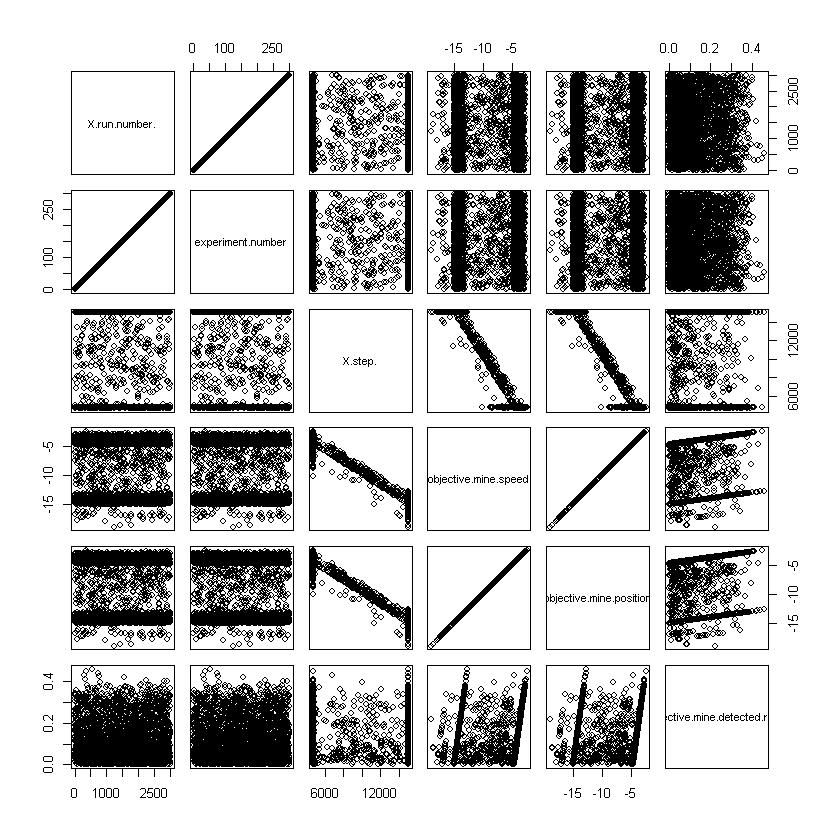

In [45]:
plot(results)

Warning message in min(x):
"no non-missing arguments to min; returning Inf"Warning message in max(x):
"no non-missing arguments to max; returning -Inf"

ERROR: Error in plot.window(xlim = xlim, ylim = ylim, log = log, yaxs = pars$yaxs): need finite 'ylim' values


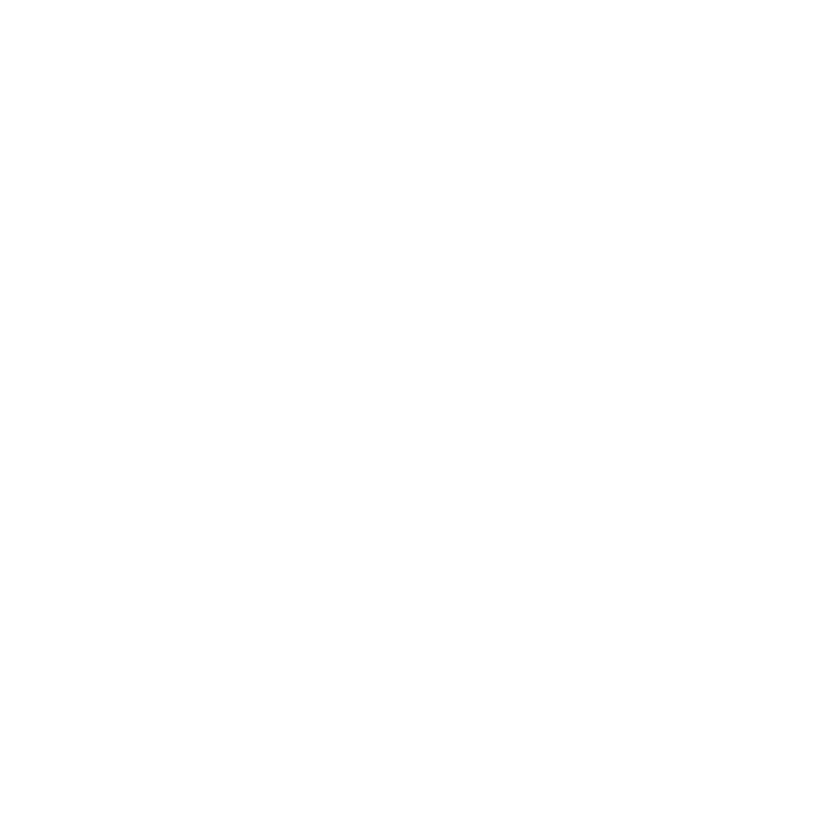

In [72]:
boxplot(data$uuv.speed,data$objective.mine.speed)

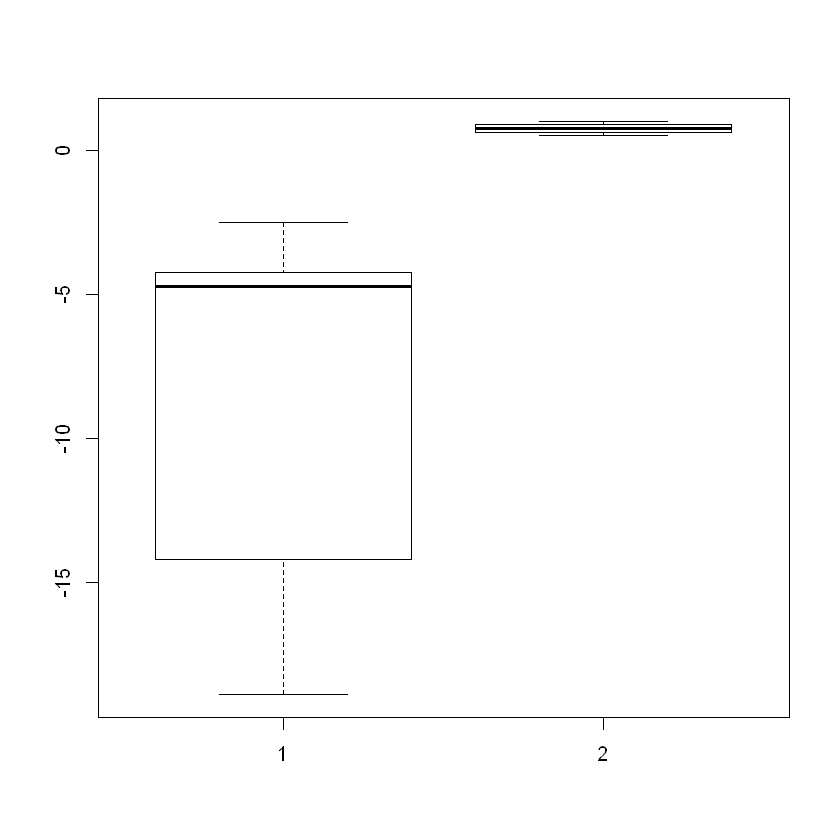

In [68]:
boxplot(data$objective.mine.speed, data$forward_p_detect)

In [69]:
describe(doe)

doe 

 18  Variables      300  Observations
--------------------------------------------------------------------------------
experiment.number 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
     300        0      300        1    149.5    100.3    14.95    29.90 
     .25      .50      .75      .90      .95 
   74.75   149.50   224.25   269.10   284.05 

lowest :   0   1   2   3   4, highest: 295 296 297 298 299
--------------------------------------------------------------------------------
turn.radius 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
     300        0      300        1       11    6.018    2.940    3.849 
     .25      .50      .75      .90      .95 
   6.510   11.011   15.486   18.172   19.075 

lowest :  2.034124  2.074839  2.175022  2.190554  2.269681
highest: 19.752929 19.804491 19.855277 19.891463 19.989747
--------------------------------------------------------------------------------
uuv.speed 
       n  missi

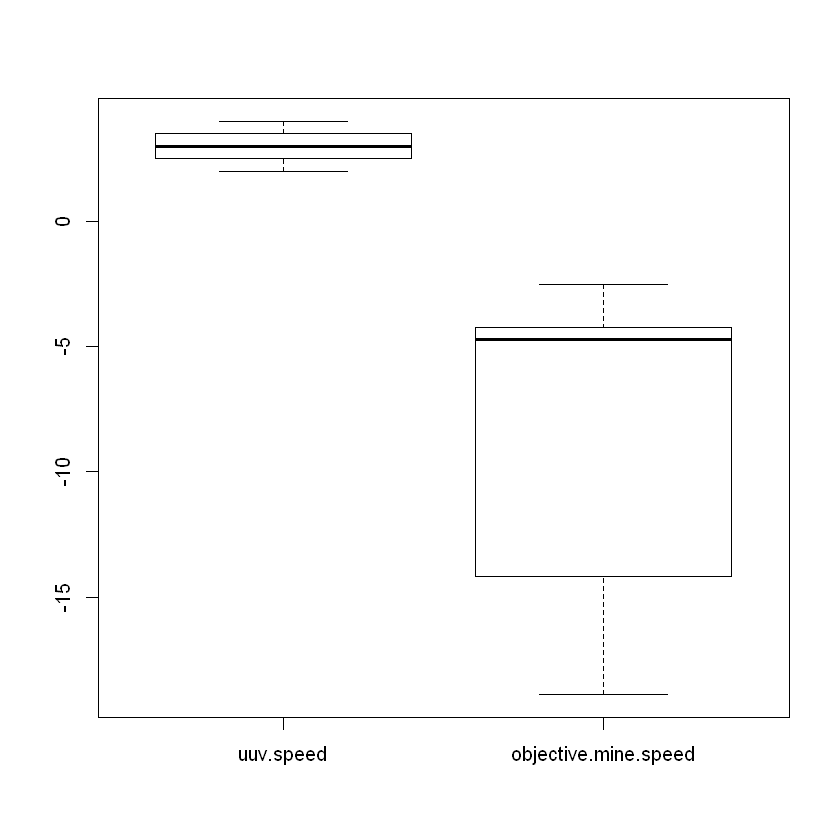

In [88]:
boxplot(data[c('uuv.speed','objective.mine.speed')])

In [73]:
boxplot(objective.mine.speed~turn.radius, data=data)

ERROR: Error in boxplot.default(split(mf[[response]], mf[-response], drop = drop, : invalid first argument


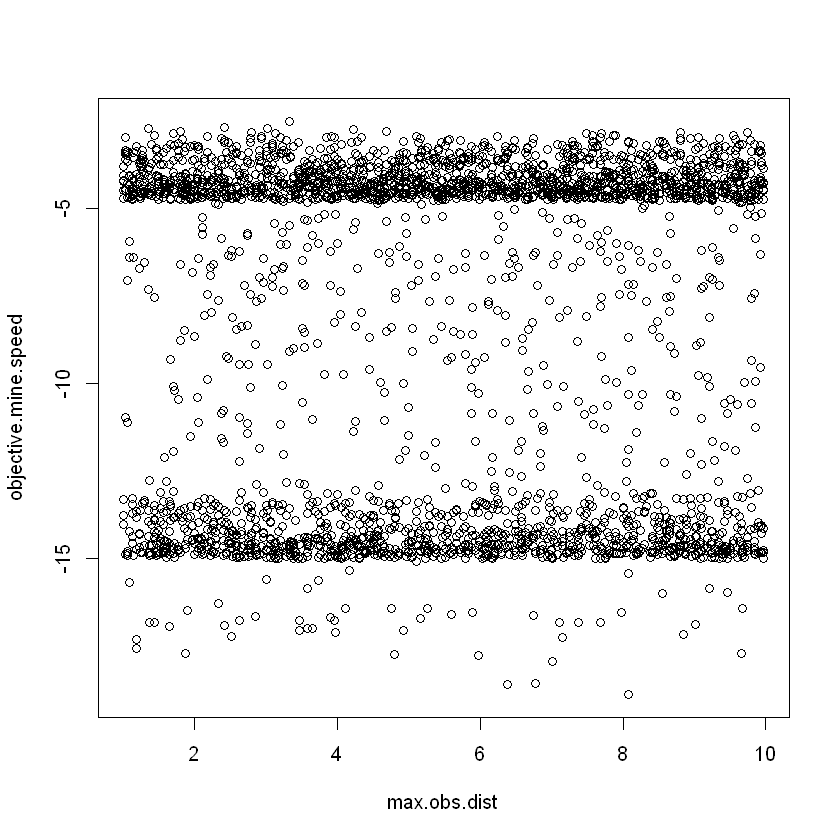

In [100]:
plot(objective.mine.speed~max.obs.dist, data=data)

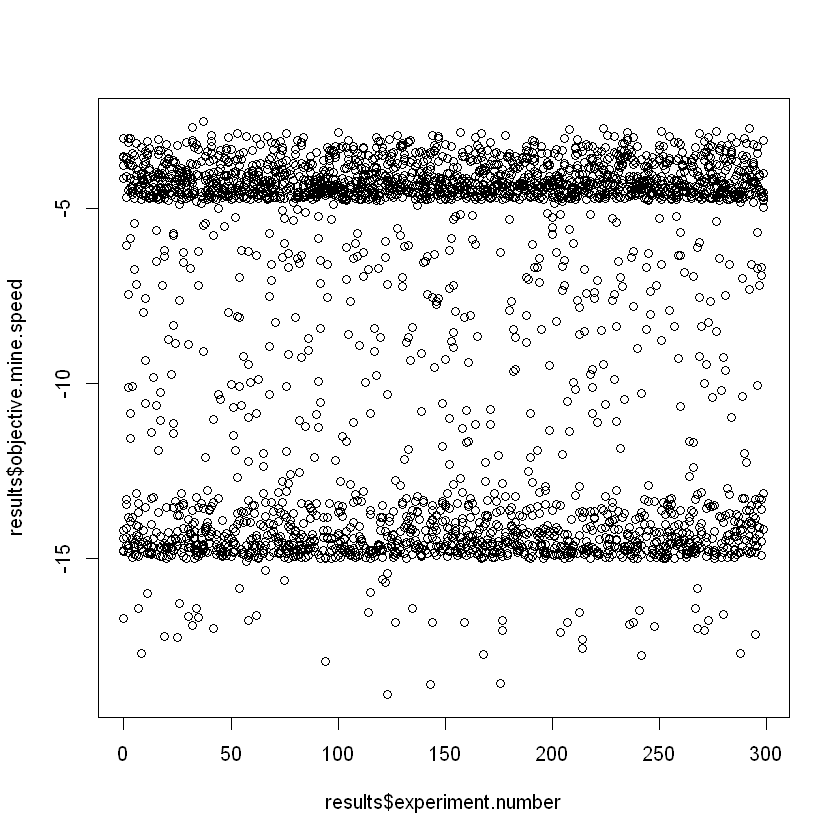

In [44]:
plot(results$experiment.number, results$objective.mine.speed)

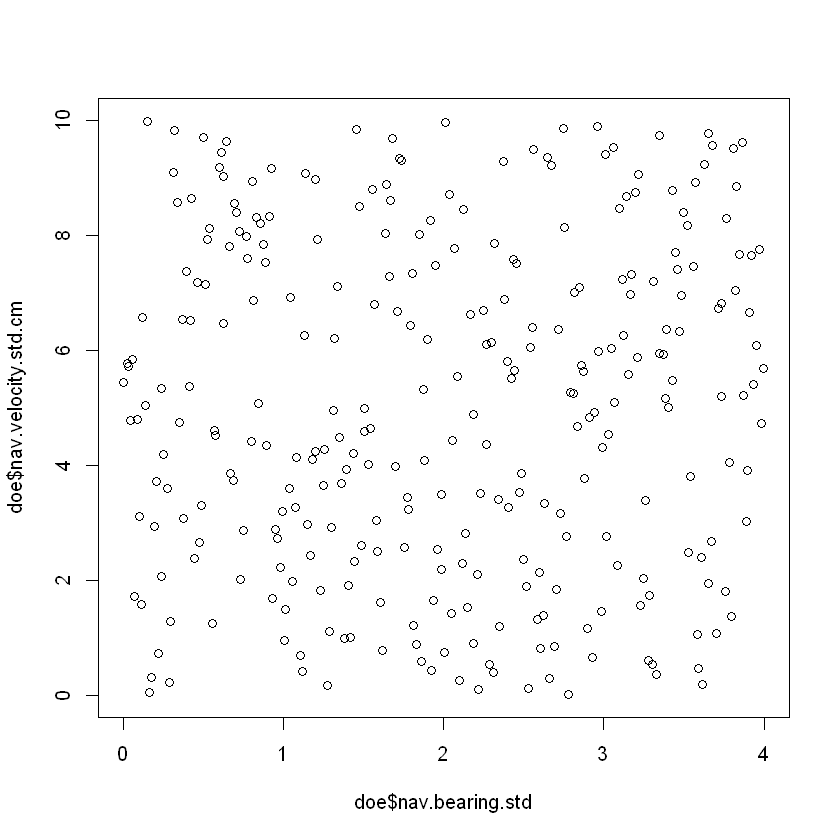

In [41]:
plot(doe$nav.bearing.std, doe$nav.velocity.std.cm)

In [22]:
describe(data$nav.velocity.std.cm)

data$nav.velocity.std.cm 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
    3000        0      300        1    4.999    3.334   0.5242   1.0020 
     .25      .50      .75      .90      .95 
  2.4973   5.0000   7.4919   8.9887   9.4987 

lowest : 0.009407459 0.040172059 0.098107403 0.118413681 0.163869569
highest: 9.846594501 9.873609642 9.902930210 9.963935590 9.991333958

In [23]:
describe(data$nav.bearing.std)

data$nav.bearing.std 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
    3000        0      300        1        2    1.334   0.2106   0.4105 
     .25      .50      .75      .90      .95 
  1.0048   1.9949   2.9968   3.5942   3.7994 

lowest : 0.006041339 0.026104244 0.035969792 0.046252233 0.058515818
highest: 3.934274962 3.950838657 3.968308243 3.983217214 3.998550054

In [113]:
cutspeed <- cut(doe$uuv.speed, breaks=c(0,1,2,3,4,5),labels=c(1,2,3,4,5))
describe(cutspeed)

cutspeed 
       n  missing distinct 
     300        0        2 
                  
Value        3   4
Frequency  150 150
Proportion 0.5 0.5

In [ ]:
data %>% group_by(experiment.number)

In [33]:
data %>% 
    group_by(experiment.number) %>% 
     groups

[[1]]
experiment.number


In [65]:
cols <- c('uuv.speed', 'turn.radius')
doe[cols] <- lapply(doe[cols], as.factor)
sapply(doe, class)

experiment.number         turn.radius           uuv.speed     nav.bearing.std 
          "integer"            "factor"            "factor"           "numeric" 
nav.velocity.std.cm        max.obs.dist       obs.influence     sonar_ping_rate 
          "numeric"           "numeric"           "numeric"           "numeric" 
         side_angle      side_low_range       side_hi_range       side_p_detect 
          "numeric"           "numeric"           "numeric"           "numeric" 
      forward_angle   forward_low_range    forward_hi_range    forward_p_detect 
          "numeric"           "numeric"           "numeric"           "numeric" 
    current.heading         drift.speed 
          "numeric"           "numeric"

In [87]:
dtrs <- loess(turn.radius ~ uuv.speed, data=data)
head(dtrs)

$n
[1] 3000

$fitted
   [1] 10.188132 10.188132 10.188132 10.188132 10.188132 10.188132 10.188132
   [8] 10.188132 10.188132 10.188132 11.201206 11.201206 11.201206 11.201206
  [15] 11.201206 11.201206 11.201206 11.201206 11.201206 11.201206 11.512702
  [22] 11.512702 11.512702 11.512702 11.512702 11.512702 11.512702 11.512702
  [29] 11.512702 11.512702 11.455823 11.455823 11.455823 11.455823 11.455823
  [36] 11.455823 11.455823 11.455823 11.455823 11.455823 11.201005 11.201005
  [43] 11.201005 11.201005 11.201005 11.201005 11.201005 11.201005 11.201005
  [50] 11.201005 11.070862 11.070862 11.070862 11.070862 11.070862 11.070862
  [57] 11.070862 11.070862 11.070862 11.070862 11.109107 11.109107 11.109107
  [64] 11.109107 11.109107 11.109107 11.109107 11.109107 11.109107 11.109107
  [71] 10.993894 10.993894 10.993894 10.993894 10.993894 10.993894 10.993894
  [78] 10.993894 10.993894 10.993894 10.639819 10.639819 10.639819 10.639819
  [85] 10.639819 10.639819 10.639819 10.639819 10.639819 10.639819 11.119848
  [92] 11.119848 11.119848 11.119848 11.119848 11.119848 11.119848 11.119848
  [99] 11.119848 11.119848 11.202491 11.202491 11.202491 11.202491 11.202491
 [106] 11.202491 11.202491 11.202491 11.202491 11.202491 10.235289 10.235289
 [113] 10.235289 10.235289 10.235289 10.235289 10.235289 10.235289 10.235289
 [120] 10.235289 10.904322 10.904322 10.904322 10.904322 10.904322 10.904322
 [127] 10.904322 10.904322 10.904322 10.904322 10.925594 10.925594 10.925594
 [134] 10.925594 10.925594 10.925594 10.925594 10.925594 10.925594 10.925594
 [141] 11.498963 11.498963 11.498963 11.498963 11.498963 11.498963 11.498963
 [148] 11.498963 11.498963 11.498963 11.197316 11.197316 11.197316 11.197316
 [155] 11.197316 11.197316 11.197316 11.197316 11.197316 11.197316 11.633356
 [162] 11.633356 11.633356 11.633356 11.633356 11.633356 11.633356 11.633356
 [169] 11.633356 11.633356 11.063283 11.063283 11.063283 11.063283 11.063283
 [176] 11.063283 11.063283 11.063283 11.063283 11.063283 11.747556 11.747556
 [183] 11.747556 11.747556 11.747556 11.747556 11.747556 11.747556 11.747556
 [190] 11.747556 10.943907 10.943907 10.943907 10.943907 10.943907 10.943907
 [197] 10.943907 10.943907 10.943907 10.943907 10.901575 10.901575 10.901575
 [204] 10.901575 10.901575 10.901575 10.901575 10.901575 10.901575 10.901575
 [211] 11.245327 11.245327 11.245327 11.245327 11.245327 11.245327 11.245327
 [218] 11.245327 11.245327 11.245327 10.989673 10.989673 10.989673 10.989673
 [225] 10.989673 10.989673 10.989673 10.989673 10.989673 10.989673 11.685244
 [232] 11.685244 11.685244 11.685244 11.685244 11.685244 11.685244 11.685244
 [239] 11.685244 11.685244 11.583520 11.583520 11.583520 11.583520 11.583520
 [246] 11.583520 11.583520 11.583520 11.583520 11.583520 11.231000 11.231000
 [253] 11.231000 11.231000 11.231000 11.231000 11.231000 11.231000 11.231000
 [260] 11.231000 11.434723 11.434723 11.434723 11.434723 11.434723 11.434723
 [267] 11.434723 11.434723 11.434723 11.434723 11.259084 11.259084 11.259084
 [274] 11.259084 11.259084 11.259084 11.259084 11.259084 11.259084 11.259084
 [281] 10.905172 10.905172 10.905172 10.905172 10.905172 10.905172 10.905172
 [288] 10.905172 10.905172 10.905172 10.855603 10.855603 10.855603 10.855603
 [295] 10.855603 10.855603 10.855603 10.855603 10.855603 10.855603 10.906879
 [302] 10.906879 10.906879 10.906879 10.906879 10.906879 10.906879 10.906879
 [309] 10.906879 10.906879 10.684422 10.684422 10.684422 10.684422 10.684422
 [316] 10.684422 10.684422 10.684422 10.684422 10.684422 11.153391 11.153391
 [323] 11.153391 11.153391 11.153391 11.153391 11.153391 11.153391 11.153391
 [330] 11.153391 10.963617 10.963617 10.963617 10.963617 10.963617 10.963617
 [337] 10.963617 10.963617 10.963617 10.963617 10.917146 10.917146 10.917146
 [344] 10.917146 10.917146 10.917146 10.917146 10.917146 10.917146 10.917146
 [351] 11.384511 11.384511 11.384511 11.384511 11.384511 11.384511 11.384511
 [358] 11.384511 11.384511 11.384511 10.410525 10.41